### Background

We must first address the following theory which will provide background into the prediction of the stock returns. The basic equation for the price of a stock tomorrow S_t given the price yesterday S_{t-1} and the rate of return e^r is given as:

    S_t = S_(t-1) * e^r

However, we must estimate the return, and Brownian motion will be the main driver. It is a stochastic process used for modeling random behavior over time. Brownian motion has two main components:

1. **Drift** — the direction that rates of returns have had in the past. That is, the expected return of the stock. You may ask yourself: why is the variance multiplied by 0.5? Because historical values are eroded in the future.
   
2. **Volatility** — the historical volatility multiplied by a random, standard normal variable.

The following equations are used to compute Brownian Motion, and the daily return of a stock:

    Drift = m - 1/2(sigma^2)



In [8]:
### Library Import Initialization

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm


[*********************100%%**********************]  1 of 1 completed


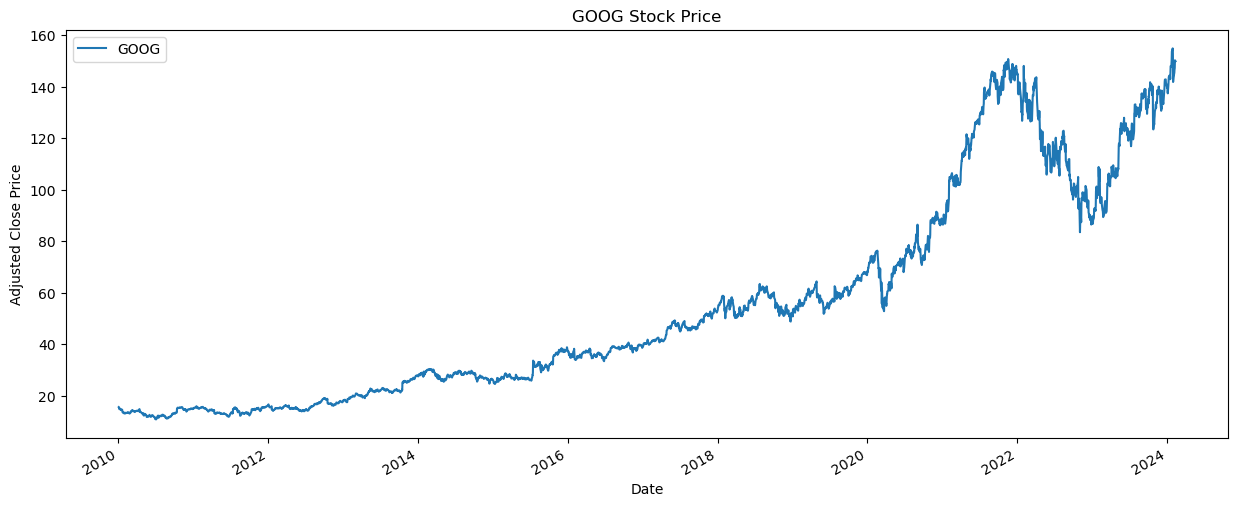

In [2]:
### Import Stock Data

# Import Stock Data
ticker = 'GOOG'
data = pd.DataFrame()
data[ticker] = yf.download(ticker, start='2010-01-01')['Adj Close']

# Plot
data.plot(figsize=(15, 6))
plt.title(f'{ticker} Stock Price')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.show()

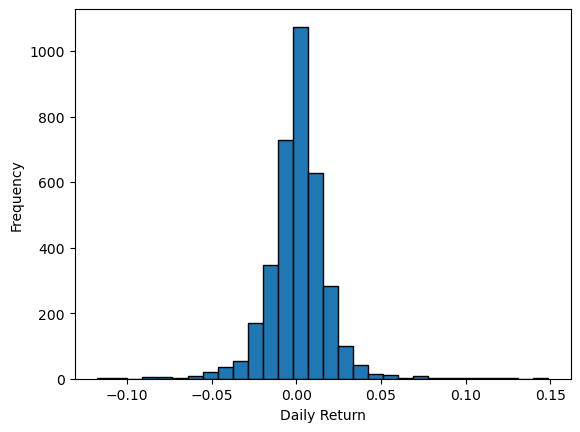

In [3]:
### Compute and Plot Log Normal Return

log_returns = np.log(1 + data.pct_change())
# Plot
plt.hist(log_returns.values.flatten()[1:], bins=30, edgecolor='black')
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()


In [4]:
### Compute Drift

mean = log_returns.mean()
var = log_returns.var()

drift = mean - (0.5*var)
drift

GOOG    0.00049
dtype: float64

In [5]:
### Compute Variance and Daily Returns

# Compute Standard Dev
stdev = log_returns.std()

# Compute Daily Returns
days = 50           # Projecting out 50 days
trials = 10000      # Total trials
# norm.ppf(np.random.rand(days, trials)) generates a 2D array of random numbers drawn from a standard normal distribution, 
# representing the random shocks or innovations for each day in each trial. norm.ppf() transforms these random numbers to be normally 
# distributed with mean 0 and standard deviation 1.
Z = norm.ppf(np.random.rand(days, trials)) 

# The equation below calculates the daily price changes using the geometric Brownian motion formula. Here, drift.values represents the drift 
# or expected return component, stdev.values represents the standard deviation of the returns (volatility), and Z represents the random shocks. 
# The exponential function np.exp() is used to transform these changes to actual price ratios.

daily_returns = np.exp(drift.values + stdev.values * Z)
daily_returns


array([[0.96515994, 1.00573842, 0.99793088, ..., 1.00408556, 0.99997096,
        1.01719564],
       [0.97240125, 1.02122098, 0.99203168, ..., 0.97899464, 1.01075108,
        1.00660539],
       [0.99846426, 0.99767864, 0.98866317, ..., 0.97188015, 1.01893972,
        1.00312054],
       ...,
       [0.98473939, 0.99084369, 0.99960836, ..., 0.9953586 , 1.0055382 ,
        0.99812735],
       [0.99178964, 1.00455247, 1.01619826, ..., 1.04217698, 0.99776699,
        1.0155183 ],
       [1.01672778, 1.0058309 , 1.00646775, ..., 1.0443728 , 1.02478226,
        0.97831939]])

<function matplotlib.pyplot.show(close=None, block=None)>

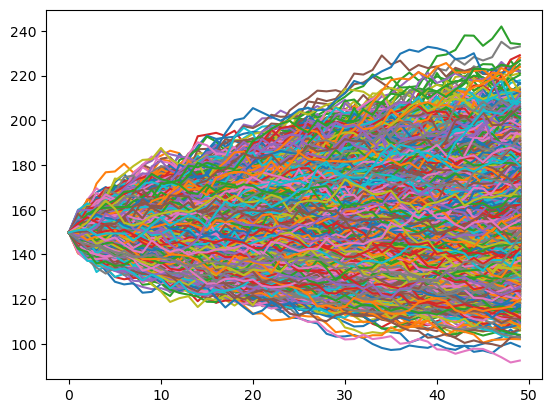

In [6]:
### Compute the Stock Price for each Trial

# initializes array with the same shape as daily_returns but filled with zeros
price_paths = np.zeros_like(daily_returns)
# set initial value of price paths to the last value in the stock prices df
price_paths[0] = data.iloc[-1]

# loop over the price paths array and compute the price at each time step (t) based on the previous price (price_paths[t-1]) and the 
# corresponding daily return (daily_returns[t])
for t in range(1, days):
    price_paths[t] = price_paths[t-1]*daily_returns[t]

# Plot each of the 10000 price paths over the 50 day span
plt.plot(price_paths)
plt.show



/var/folders/n5/bknqp6qs37l5l4bwv9wv3bs40000gn/T/ipykernel_50040/1134733644.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, ax=ax[0])
/var/folders/n5/bknqp6qs37l5l4bwv9wv3bs40000gn/T/ipykernel_50040/1134733644.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, hist_kws={'cumulative':

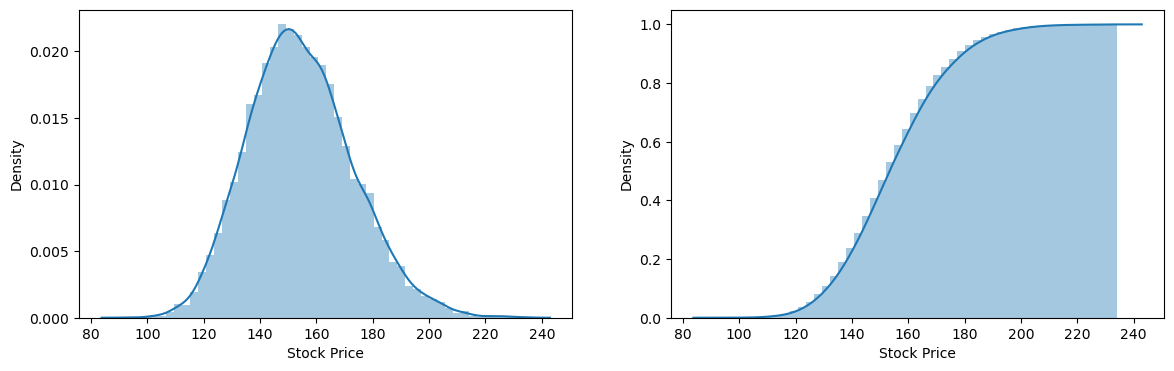

In [7]:
### Plot the PDF and CDF of the 10000 paths

# Creating a df of all the price paths
x = pd.DataFrame(price_paths).iloc[-1]

fig, ax = plt.subplots(1, 2, figsize=(14, 4))

# Plot the first subplot of the PDF
sns.distplot(x, ax=ax[0])
ax[0].set_xlabel("Stock Price")

# Plot the second subplot of the CDF
sns.distplot(x, hist_kws={'cumulative': True}, kde_kws={'cumulative': True}, ax=ax[1])
ax[1].set_xlabel("Stock Price")

plt.show()